# Linear Programming Tutorial using Scipy

#### Note: You can access the colab version of this notebook [here](https://colab.research.google.com/github/amirkfard/CVL609-W23/blob/main/LinearProgramming.ipynb) .

In this tutorial, you will learn how to use Scipy library in Python to model and solve linear programming optimization problems.




## Linear Optimization
Linear optimization (or *linear programming*) is the name given to computing the best solution to a problem modeled as a set of linear relationships. These problems arise in many scientific and engineering disciplines. (The word "programming" is a bit of a misnomer, similar to how "computer" once meant "a person who computes." Here, "programming" refers to the arrangement of a plan, rather than programming in a computer language.)

## Required Steps for Solving an LP Problem with Scipy ([ref.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.linprog.html))
The following sections present an example of an LP problem and show how to solve it. Here's the problem:

__Maximize $3x + 4y$__ subject to the following constraints:

$x + 2y	≤	14$

$3x – y	≥	0$

$x – y	≤	2$

Both the objective function, $3x + 4y$, and the constraints are given by linear expressions, which makes this a linear problem.

The constraints define the feasible region, which is the triangle shown below, including its interior.

<img src="https://developers.google.com/optimization/images/lp/feasible_region.png" width="600">



### Basic steps for solving an LP problem

To solve a LP problem, your program should include the following steps:

The steps for solving a linear programming (LP) problem using the `linprog` function from `Scipy.optimize` are as follows:

1. Define the objective function: The objective function is the linear equation that needs to be optimized, for example, maximize the profit or minimize the cost.

2. Define the constraints: Constraints are the conditions that the solution must satisfy. These constraints are usually represented as linear inequalities or equalities.

3. Formulate the LP problem in standard form: The LP problem needs to be formulated in standard form, which requires the objective function to be minimized and the constraints to be expressed as equalities or inequalities with non-negative variables.

4. Import the `linprog` function from Scipy.optimize: To use the `linprog` function, you need to first import it from the Scipy.optimize library.

5. Provide the inputs to the `linprog` function: The inputs to the `linprog` function include the coefficients of the objective function, the constraint matrix, the bounds on the variables, and the optimization method (minimization or maximization).

4. Call the `linprog` function: Once the inputs have been provided, the `linprog` function can be called to solve the LP problem.

5. Interpret the results: The results of the `linprog` function include the optimal values of the variables, the optimal objective value, and the status of the optimization (whether the problem is feasible, infeasible, or unbounded).

It's important to note that the `linprog` function in Scipy.optimize assumes that the LP problem is in standard form, so it's necessary to reformulate the problem if it's not already in this form.










#### Import required libraries and functions


In [35]:
import numpy as np
from scipy.optimize import linprog

#### Define the coefficients of the objective function

The following code defines the objective function, $3x + 4y$.
For using `linprog` function, every objective function must be formulation as a minimization problem. For example, instead of $Maximize$ $f(x,y)=3x + 4y$, we can $Minimize$ $f(x,y)=-3x - 4y$

In [36]:
# Define the coefficients for the objective function
c = np.array([-3, -4])

#### Define the coefficients of the constraints


In [37]:
# Define the coefficient matrix for the constraints
A = np.array([[1, 2], [-3, 1], [1, -1]])
# Define the constraints as upper bounds
b = np.array([14, 0, 2])

#### Define the bounds on the decision variables


In [38]:
# Define the bounds for each variable
x0_bounds = (0, None)
x1_bounds = (0, None)
bounds = (x0_bounds, x1_bounds)

#### Call the `linprog` function to solve the LP problem



In [39]:
# Call the linprog function
res = linprog(c, A_ub=A, b_ub=b, bounds=bounds, method="simplex")

#### Print and analyze the results



In [40]:
# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: x =', round(res.x[0], ndigits=2), 'y =', round(res.x[1], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)

     con: array([], dtype=float64)
     fun: -33.99999999999999
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.77635684e-15, 1.40000000e+01, 4.44089210e-16])
  status: 0
 success: True
       x: array([6., 4.])
****************************

Optimal value: -34.0

Optimal variables: x = 6.0 y = 4.0

Number of iterations performed: 4

Status: Optimization terminated successfully.




Here is a graph showing the solution:

The dashed green line is defined by setting the objective function equal to its optimal value of 34. Any line whose equation has the form 3x + 4y = c is parallel to the dashed line, and 34 is the largest value of c for which the line intersects the feasible region.
<img src="https://developers.google.com/optimization/images/lp/feasible_region_solution.png" width="600">




#### The complete code
The complete programs are shown below.


In [41]:
import numpy as np
from scipy.optimize import linprog



# Define the coefficients for the objective function
obj = np.array([-3, -4])

# Define the coefficient matrix for the constraints
lhs = np.array([[1, 2], [-3, 1], [1, -1]])

# Define the constraints as upper bounds
rhs = np.array([14, 0, 2])


# Define the bounds for each variable
x0_bounds = (0, None)
x1_bounds = (0, None)
bounds = (x0_bounds, x1_bounds)

# Call the linprog function
res = linprog(c=obj, A_ub=lhs, b_ub=rhs, bounds=bounds, method="simplex")

# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: x =', round(res.x[0], ndigits=2), 'y =', round(res.x[1], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)



     con: array([], dtype=float64)
     fun: -33.99999999999999
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([1.77635684e-15, 1.40000000e+01, 4.44089210e-16])
  status: 0
 success: True
       x: array([6., 4.])
****************************

Optimal value: -34.0

Optimal variables: x = 6.0 y = 4.0

Number of iterations performed: 4

Status: Optimization terminated successfully.


# Example 1 - Production Plan


<img src="https://github.com/amirkfard/CVL609-W23/blob/main/img/lp-production-plan1.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609-W23/blob/main/img/lp-production-plan2.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609-W23/blob/main/img/production-plan.webp?raw=1" width="800">

In [42]:
import numpy as np
from scipy.optimize import linprog

# Define the coefficients for the objective function
obj = np.array([-3, -5])

# Define the coefficient matrix for the constraints
lhs = np.array([[1, 0], [0, 2], [3, 2]])

# Define the constraints as upper bounds
rhs = np.array([4, 8, 18])



# Define the bounds for each variable
x0_bounds = (0, None)
x1_bounds = (0, None)
bounds = (x0_bounds, x1_bounds)

# Call the linprog function
res = linprog(c=obj, A_ub=lhs, b_ub=rhs, bounds=bounds, method="simplex")

# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: x1 =', round(res.x[0], ndigits=2), 'x2 =', round(res.x[1], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)



     con: array([], dtype=float64)
     fun: -30.0
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([0.66666667, 0.        , 0.        ])
  status: 0
 success: True
       x: array([3.33333333, 4.        ])
****************************

Optimal value: -30.0

Optimal variables: x1 = 3.33 x2 = 4.0

Number of iterations performed: 3

Status: Optimization terminated successfully.


# Example 2 - Scaffolding Structure


<img src="https://github.com/amirkfard/CVL609-W23/blob/main/img/lp-scaffolding1.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609-W23/blob/main/img/lp-scaffolding2.webp?raw=1" width="800">


In [43]:
import numpy as np
from scipy.optimize import linprog


# Define the coefficients for the objective function
obj = np.array([-1, -1, -1])


# Define the coefficient matrix for the constraints
lhs = np.array([[1/4, 3/4, 3/8],
              [3/4, 1/4, 5/8],
              [0  , 3/4, 1/4],
              [0  , 1/4, 1/4],
              [0  , 0  , 1/2]])

# Define the constraints as upper bounds
rhs = np.array([400, 400, 150, 150, 75])


# Define the bounds for each variable
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
bounds = (x0_bounds, x1_bounds, x2_bounds)

# Call the linprog function
res = linprog(c=obj, A_ub=lhs, b_ub=rhs, bounds=bounds, method="simplex")

# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: w1 =', round(res.x[0], ndigits=2), 'w2 =', round(res.x[1], ndigits=2), 'w3 =', round(res.x[2], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)



     con: array([], dtype=float64)
     fun: -666.6666666666666
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([133.33333333,   0.        ,   0.        , 100.        ,
        75.        ])
  status: 0
 success: True
       x: array([466.66666667, 200.        ,   0.        ])
****************************

Optimal value: -666.67

Optimal variables: w1 = 466.67 w2 = 200.0 w3 = 0.0

Number of iterations performed: 6

Status: Optimization terminated successfully.


# Example 3 - Cost Sharing

<img src="https://github.com/amirkfard/CVL609-W23/blob/main/img/lp-cost-sharing1.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609-W23/blob/main/img/lp-cost-sharing2.webp?raw=1" width="800">


In [44]:
import numpy as np
from scipy.optimize import linprog

# Define the coefficients for the objective function
obj = np.array([1, 1, 1])


# Define the coefficient matrix for the constraints
lhs = np.array([[1, 0, 0],
              [0, 1, 0],
              [0, 0, 1],
              [1, 1, 0],
              [0, 1, 1],
              [1, 0, 1],
              [-1, -1, -1]])
      

# Define the constraints as upper bounds
rhs = np.array([1, 1.3, 2.2, 1.7, 2.9, 2.7, -3.6])



# Define the bounds for each variable
x0_bounds = (0, None)
x1_bounds = (0, None)
x2_bounds = (0, None)
bounds = (x0_bounds, x1_bounds, x2_bounds)

# Call the linprog function
res = linprog(c=obj, A_ub=lhs, b_ub=rhs, bounds=bounds, method="simplex")

# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: xA =', round(res.x[0], ndigits=2), 'xB =', round(res.x[1], ndigits=2), 'xC =', round(res.x[2], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)



     con: array([], dtype=float64)
     fun: 3.5999999999999996
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([ 3.0000000e-01,  4.0000000e-01,  2.0000000e-01,  1.0000000e-01,
        0.0000000e+00,  0.0000000e+00, -4.4408921e-16])
  status: 0
 success: True
       x: array([0.7, 0.9, 2. ])
****************************

Optimal value: 3.6

Optimal variables: xA = 0.7 xB = 0.9 xC = 2.0

Number of iterations performed: 8

Status: Optimization terminated successfully.


## Example 4 - Water Source

<img src="https://github.com/amirkfard/CVL609/blob/main/img/2_problem.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609/blob/main/img/2_table.webp?raw=1" width="600">
<img src="https://github.com/amirkfard/CVL609/blob/main/img/2_model.webp?raw=1" width="800">

In [45]:
import numpy as np
from scipy.optimize import linprog


# Define the coefficients for the objective function
obj = np.array([500, 1000, 2000])


# Define the coefficient matrix for the constraints
lhs = np.array([[-1, -1, -1],
              [200, 2300, 700]])
      

# Define the constraints as upper bounds
rhs = np.array([-150, 1200*150])


# Define the bounds for each variable
x0_bounds = (0, 25)
x1_bounds = (0, 120)
x2_bounds = (0, 100)
bounds = (x0_bounds, x1_bounds, x2_bounds)

# Call the linprog function
res = linprog(c=obj, A_ub=lhs, b_ub=rhs, bounds=bounds, method="simplex")

# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: x1 =', round(res.x[0], ndigits=2), 'x2 =', round(res.x[1], ndigits=2), 'x3 =', round(res.x[2], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)



     con: array([], dtype=float64)
     fun: 207812.5
 message: 'Optimization terminated successfully.'
     nit: 6
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([25.    , 54.6875, 70.3125])
****************************

Optimal value: 207812.5

Optimal variables: x1 = 25.0 x2 = 54.69 x3 = 70.31

Number of iterations performed: 6

Status: Optimization terminated successfully.


## Example 5 - Wastewater treatment efficiency

<img src="https://github.com/amirkfard/CVL609/blob/main/img/3_fig.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609/blob/main/img/3_problem1.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609/blob/main/img/3_problem2.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609/blob/main/img/3_model.webp?raw=1" width="800">

In [46]:
import numpy as np
from scipy.optimize import linprog

# Define the coefficients for the objective function
obj = np.array([2e5, 1e5])


# Define the coefficient matrix for the constraints
lhs = np.array([[-1, -1]])

# Define the constraints as upper bounds
rhs = np.array([-100])



# Define the bounds for each variable
x0_bounds = (50, None)
x1_bounds = (35, None)
bounds = (x0_bounds, x1_bounds)

# Call the linprog function
res = linprog(c=obj, A_ub=lhs, b_ub=rhs, bounds=bounds, method="simplex")

# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: x1 =', round(res.x[0], ndigits=2), 'x2 =', round(res.x[1], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)



     con: array([], dtype=float64)
     fun: 15000000.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([0.])
  status: 0
 success: True
       x: array([50., 50.])
****************************

Optimal value: 15000000.0

Optimal variables: x1 = 50.0 x2 = 50.0

Number of iterations performed: 2

Status: Optimization terminated successfully.


## Example 6 - Ore Production

<img src="https://github.com/amirkfard/CVL609/blob/main/img/4_problem.webp?raw=1" width="800">
<img src="https://github.com/amirkfard/CVL609/blob/main/img/4_table.webp?raw=1" width="600">
<img src="https://github.com/amirkfard/CVL609/blob/main/img/4_model.webp?raw=1" width="800">

In [47]:
import numpy as np
from scipy.optimize import linprog

# Define the coefficients for the objective function
obj = np.array([180, 160])


# Define the coefficient matrix for the constraints
lhs = np.array([[-6, -1], [-3, -1], [-4, -6]])

# Define the constraints as upper bounds
rhs = np.array([-12, -8, -24])


# Define the bounds for each variable
x0_bounds = (0, None)
x1_bounds = (0, None)
bounds = (x0_bounds, x1_bounds)

# Call the linprog function
res = linprog(c=obj, A_ub=lhs, b_ub=rhs, bounds=bounds, method="simplex")

# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: x1 =', round(res.x[0], ndigits=2), 'x2 =', round(res.x[1], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)



     con: array([], dtype=float64)
     fun: 765.7142857142858
 message: 'Optimization terminated successfully.'
     nit: 3
   slack: array([1.14285714, 0.        , 0.        ])
  status: 0
 success: True
       x: array([1.71428571, 2.85714286])
****************************

Optimal value: 765.71

Optimal variables: x1 = 1.71 x2 = 2.86

Number of iterations performed: 3

Status: Optimization terminated successfully.


### Graphical Solution

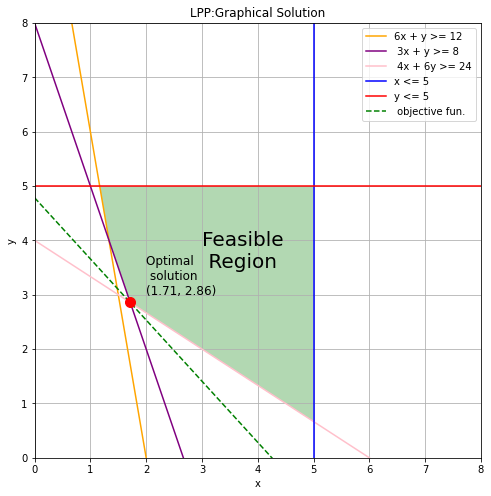

In [48]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 7)
plt.figure(figsize=(8,8))
plt.plot(x, 12.0 - 6.0*x, color = 'orange', label = '6x + y >= 12')
plt.plot(x, 8.0 - 3*x, color = 'purple', label= ' 3x + y >= 8')
plt.plot(x, 4.0 - (4/6)*x, color = 'pink', label= ' 4x + 6y >= 24')
plt.axvline(x = 5, color = 'blue',label = 'x <= 5')
plt.axhline(y = 5, color = 'red',label = 'y <= 5')
plt.plot(x, 4.784 - 1.125*x, color = 'green',linestyle = '--' , label= ' objective fun.')
plt.plot(12/7, 20/7, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

plt.xlim([0, 8])
plt.ylim([0, 8])

# Define the boundaries of the feasible area in the plot
x = [12/7, 4/3, 7/6, 5, 5]
y = [20/7, 4, 5, 5, 4/6]
plt.fill(x, y, 'green' , alpha = 0.3)

plt.text(3, 3.5, 'Feasible \n Region', size = '20')
plt.annotate('Optimal \n solution\n(1.71, 2.86)', xy = (2, 3), size = '12')

plt.xlabel("x")
plt.ylabel("y")
plt.title('LPP:Graphical Solution')
plt.grid(True)
plt.legend()
plt.show()

## Example 7

<img src="https://github.com/amirkfard/CVL609/blob/main/img/lp_5_problem.webp?raw=1" width="800">

In [49]:
import numpy as np
from scipy.optimize import linprog

# Define the coefficients for the objective function
obj = np.array([-140, -160])


# Define the coefficient matrix for the constraints
lhs = np.array([[2, 4], [5, 5]])

# Define the constraints as upper bounds
rhs = np.array([28, 50])


# Define the bounds for each variable
x0_bounds = (0, 8)
x1_bounds = (0, 6)
bounds = (x0_bounds, x1_bounds)

# Call the linprog function
res = linprog(c=obj, A_ub=lhs, b_ub=rhs, bounds=bounds, method="simplex")

# Print the results
print(res)
print('****************************')

print('\nOptimal value:', round(res.fun, ndigits=2))
print('\nOptimal variables: x1 =', round(res.x[0], ndigits=2), 'x2 =', round(res.x[1], ndigits=2))
print('\nNumber of iterations performed:', res.nit)
print('\nStatus:', res.message)



     con: array([], dtype=float64)
     fun: -1480.0
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([0., 0.])
  status: 0
 success: True
       x: array([6., 4.])
****************************

Optimal value: -1480.0

Optimal variables: x1 = 6.0 x2 = 4.0

Number of iterations performed: 4

Status: Optimization terminated successfully.


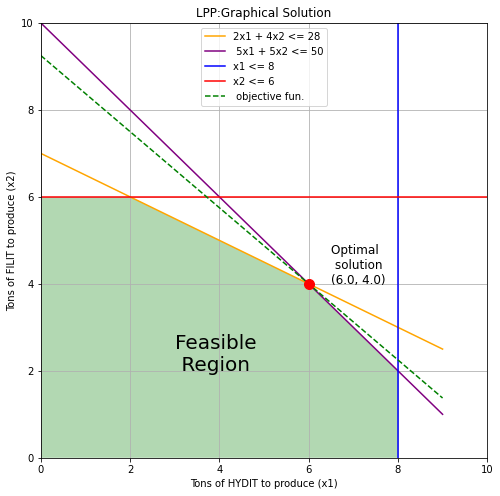

In [50]:
# Plot the optimal solution
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 10)
plt.figure(figsize=(8,8))
plt.plot(x, 7.0 - 0.5*x, color = 'orange', label = '2x1 + 4x2 <= 28')
plt.plot(x, 10 - x, color = 'purple', label= ' 5x1 + 5x2 <= 50')
plt.axvline(x = 8, color = 'blue',label = 'x1 <= 8')
plt.axhline(y = 6, color = 'red',label = 'x2 <= 6')
plt.plot(x, 9.25 - 0.875*x, color = 'green',linestyle = '--'  , label= ' objective fun.')
plt.plot(6, 4, marker="o", markersize=10, markeredgecolor="red", markerfacecolor="red")

plt.xlim([0, 10])
plt.ylim([0, 10])

# Define the boundaries of the feasible area in the plot
x = [0, 0, 2, 6, 8, 8]
y = [0, 6, 6, 4, 2, 0]
plt.fill(x, y, 'green' , alpha = 0.3)

plt.text(3, 2, 'Feasible \n Region', size = '20')
plt.annotate('Optimal \n solution\n(6.0, 4.0)', xy = (6.5, 4.0), size = '12')

plt.xlabel("Tons of HYDIT to produce (x1)")
plt.ylabel("Tons of FILIT to produce (x2)")
plt.title('LPP:Graphical Solution')
plt.grid(True)
plt.legend()
plt.show()